In [2]:
# Import Python standard library and IPython packages we need.
import os
import subprocess
import sys
from pathlib import Path

# Ask GRASS GIS where its Python packages are.
sys.path.append(
    subprocess.check_output(["grass", "--config", "python_path"], text=True).strip()
)

# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.jupyter as gj

In [3]:
grass_project = "~/grassdata/nc_spm_08_grass7/user1/"
session = gj.init(grass_project)

In [7]:
gs.run_command("g.region", raster="elevation")

In [16]:
gs.run_command("r.flow", elevation="elevation", flowline="flowline", skip=10)

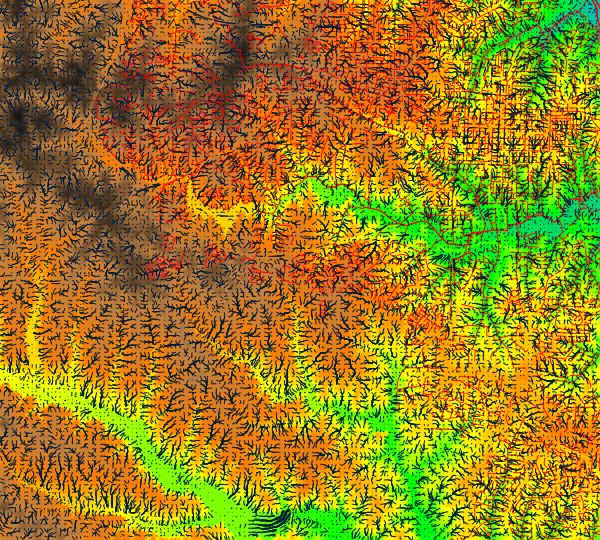

In [22]:
sewer_map = gj.Map()
sewer_map.d_background(color="white")
sewer_map.d_rast(map="elevation")
sewer_map.d_vect(map="mains", color="red")
sewer_map.d_vect(map="flowline")
sewer_map.show()

In [43]:
%%time
gs.run_command("r.watershed", elevation="elevation", stream="stream", accumulation="accumulation", threshold=1000)
gs.run_command("r.mapcalc", expression="accumulation_limit = if(abs(accumulation) > 100, 1, null())")
gs.run_command("r.thin", input="accumulation_limit", output="accumulation_streams", iterations=1000)
gs.run_command("r.to.vect", input="accumulation_streams", output="stream", type="line")

CPU times: user 9.69 ms, sys: 11.7 ms, total: 21.4 ms
Wall time: 4.9 s


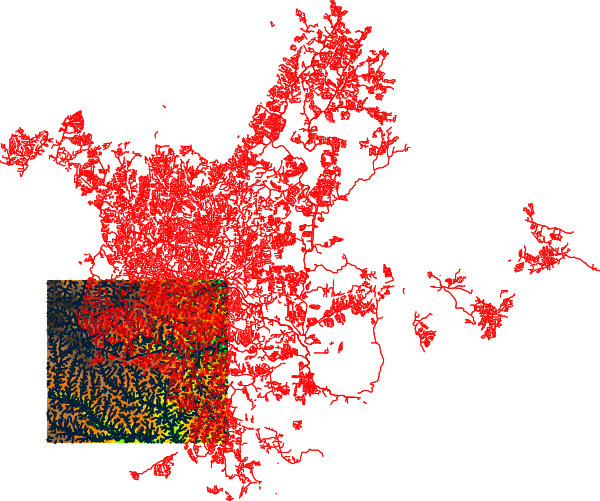

In [46]:
sewer_map = gj.Map()
sewer_map.d_background(color="white")
sewer_map.d_vect(map="mains", color="red")
sewer_map.d_rast(map="elevation")
#sewer_map.d_rast(map="accumulation_limit")
sewer_map.d_vect(map="stream", width=2)
sewer_map.d_vect(map="mains", color="red")
sewer_map.show()

In [48]:
%%time
gs.run_command("g.region", raster="elev_state_500m")
gs.run_command("r.watershed", elevation="elev_state_500m", stream="stream", accumulation="accumulation", threshold=1000)
gs.run_command("r.mapcalc", expression="accumulation_limit = if(abs(accumulation) > 100, 1, null())")
gs.run_command("r.thin", input="accumulation_limit", output="accumulation_streams", iterations=1000)
gs.run_command("r.to.vect", input="accumulation_streams", output="stream", type="line")

CPU times: user 4.77 ms, sys: 18.1 ms, total: 22.9 ms
Wall time: 2.44 s


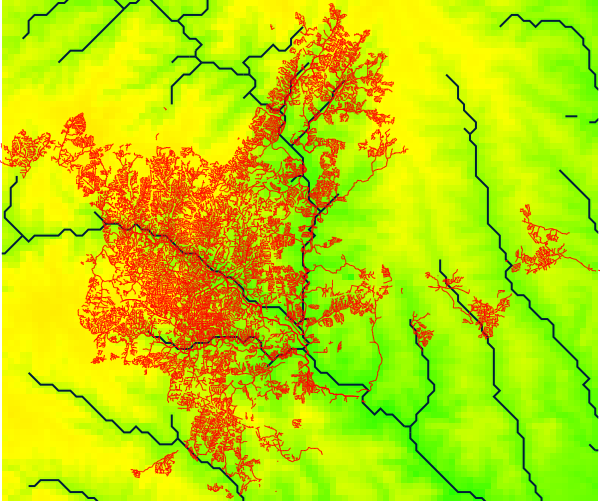

In [49]:
sewer_map = gj.Map()
sewer_map.d_background(color="white")
sewer_map.d_vect(map="mains", color="red")
sewer_map.d_rast(map="elev_state_500m")
#sewer_map.d_rast(map="accumulation_limit")
sewer_map.d_vect(map="stream", width=2)
sewer_map.d_vect(map="mains", color="red")
sewer_map.show()

In [58]:
%%time
gs.run_command("g.region", raster="ned")
gs.run_command("r.watershed", elevation="ned", stream="stream", accumulation="accumulation", threshold=1000)
gs.run_command("r.mapcalc", expression="accumulation_limit = if(abs(accumulation) > 100, 1, null())")
gs.run_command("r.thin", input="accumulation_limit", output="accumulation_streams", iterations=1000)
gs.run_command("r.to.vect", input="accumulation_streams", output="stream", type="line")

Extracting lines...
Crowded cell at (631873.500000, 251602.500000): row 30, col 1927, count 8
ERROR: Raster map is not thinned properly.
       Please run r.thin.


CalledModuleError: Module run `r.to.vect input=accumulation_streams output=stream type=line` ended with an error.
The subprocess ended with a non-zero return code: 1. See errors above the traceback or in the error output.

In [60]:
gs.run_command("r.thin", input="accumulation_limit", output="accumulation_streams", iterations=2000)
gs.run_command("r.to.vect", input="accumulation_streams", output="stream", type="line")

Extracting lines...
Crowded cell at (631873.500000, 251602.500000): row 30, col 1927, count 8
ERROR: Raster map is not thinned properly.
       Please run r.thin.


CalledModuleError: Module run `r.to.vect input=accumulation_streams output=stream type=line` ended with an error.
The subprocess ended with a non-zero return code: 1. See errors above the traceback or in the error output.

In [ ]:
sewer_map = gj.Map()
sewer_map.d_background(color="white")
#sewer_map.d_vect(map="mains", color="red")
sewer_map.d_rast(map="ned")
#sewer_map.d_rast(map="accumulation_limit")
sewer_map.d_vect(map="stream", width=2)
sewer_map.d_vect(map="mains", color="red")
sewer_map.show()

In [55]:
%%time
gs.run_command("g.region", vector="mains")
gs.run_command("r.in.usgs", product="ned", ned_dataset="ned19sec", memory=20000, nprocs=8, output_name="ned")

CPU times: user 1.23 s, sys: 830 ms, total: 2.06 s
Wall time: 3min 21s


In [19]:
sewers_directory = "data/sewers"
sewers_file = "mains"
sewer_vector = "mains"
gs.run_command(
    "v.import", input=sewers_directory, layer=sewers_file, output=sewer_vector
)